In [133]:
import plotly.io as pio
pio.renderers.default = "iframe"

import matplotlib.pyplot as plt
import branca.colormap as cm
import contextily as ctx
import contextily as cx
import geopandas as gpd
import pandas as pd
import numpy as np
import folium

# Geospatial Data

**What is geospatial data?**
- Data that has a geographic component (latitude/longitude, administrative regions).

**Examples:**
1) Population data by country
2) GPS coordinates
3) Migration routes

**Why is it important?**
- Used in urban planning, disaster response, transportation, environmental monitoring.

**Python libraries for geospatial visualization:**
- GeoPandas: Static plots, good for vector data (shapefiles, GeoJSON).
- Folium: Interactive leaflet.js maps, good for points & layers.
- Plotly: High-quality interactive visualizations for exploratory analysis.

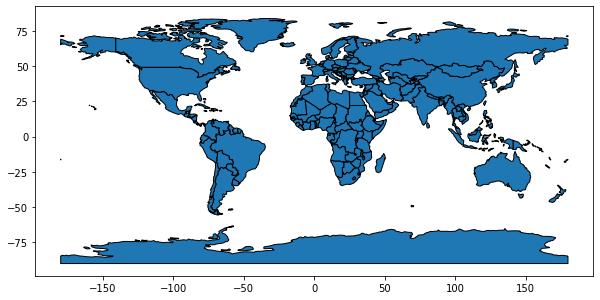

In [134]:


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=(10, 6), edgecolor="black")
plt.show()

GeoPandas is an extension of Pandas for geospatial data.
This is a vector-based plot (shapefile-like data).
What’s happening here?
The dataset contains country polygons.
We are using plot() to visualize boundaries.
Edge colors help define country borders.
How can we extend it?
Color by population (world.plot(column='pop_est', cmap='OrRd')).
Show only certain continents (world[world['continent'] == 'Africa']).
Use basemaps to improve visualization (next example).

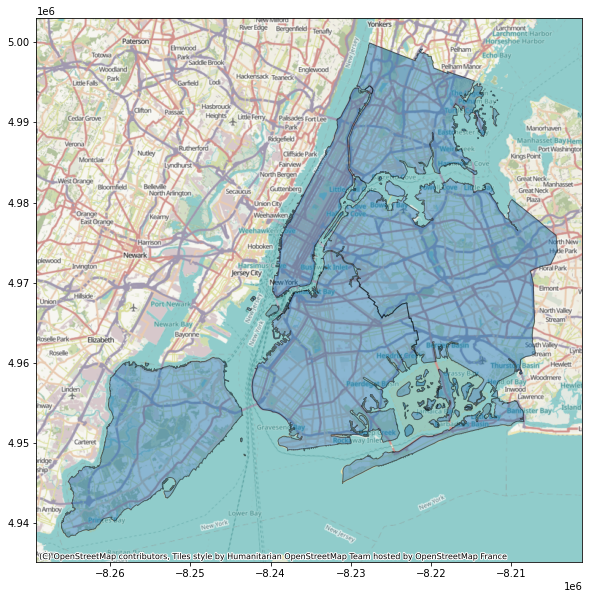

In [135]:


world = gpd.read_file(gpd.datasets.get_path('nybb'))
world_wm = world.to_crs(epsg=3857)
ax = world_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)

Why do we need basemaps?
- Basemaps provide context (e.g., terrain, streets, satellite imagery).
- Without a basemap, country boundaries float in empty space.

Why do we need to reproject the data?
- Web-based maps use Web Mercator projection (EPSG:3857). contextily requires the data to be in this format.

What does this basemap show?
- This example uses CartoDB Positron, a clean, grayscale basemap.

How can we customize it?
- Use a different basemap (ctx.providers.OpenStreetMap.Mapnik).
- Change transparency (alpha=0.3 for more visibility).
- Zoom in to a specific country (world[world.name == 'United States']).

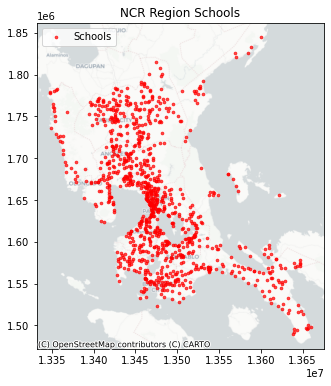

In [136]:


# Load Earthquake data (USGS live data feed)
url = "./data/for_planet.csv"
earthquakes = pd.read_csv(url)
earthquakes = earthquakes.sample(1000)

# Convert to GeoDataFrame
gdf_eq = gpd.GeoDataFrame(earthquakes, geometry=gpd.points_from_xy(earthquakes.longitude, earthquakes.latitude))

# Set CRS and reproject for basemap compatibility
gdf_eq.set_crs(epsg=4326, inplace=True)
gdf_eq = gdf_eq.to_crs(epsg=3857)

# Plot world map and overlay earthquakes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot earthquakes (size based on magnitude)
gdf_eq.plot(ax=ax, color="red", alpha=0.7, markersize = 7, label="Schools")

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.legend()
plt.title("NCR Region Schools")
plt.show()


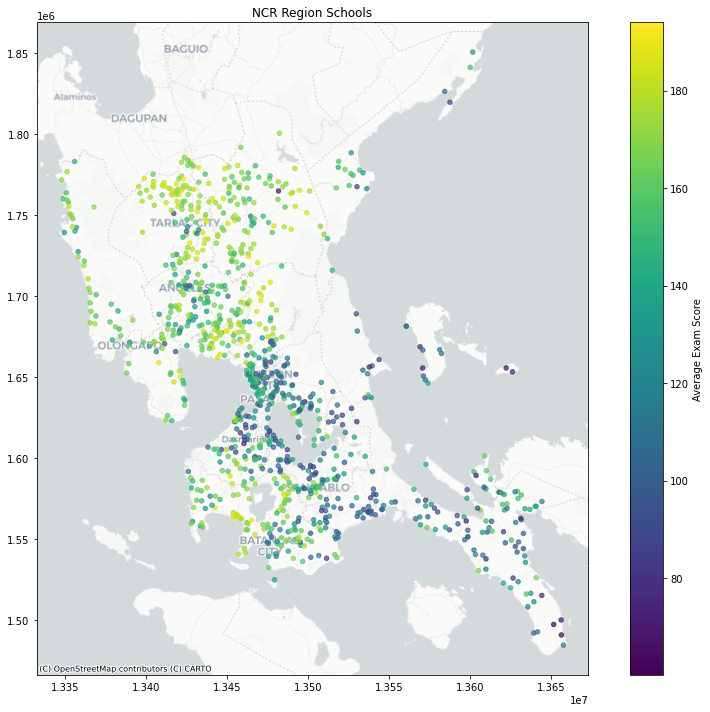

In [137]:


# Load Earthquake data (USGS live data feed)
url = "./data/for_planet.csv"
earthquakes = pd.read_csv(url).sample(1000)

# Convert to GeoDataFrame
gdf_eq = gpd.GeoDataFrame(earthquakes, geometry=gpd.points_from_xy(earthquakes.longitude, earthquakes.latitude))

# Set CRS and reproject for basemap compatibility
gdf_eq.set_crs(epsg=4326, inplace=True)
gdf_eq = gdf_eq.to_crs(epsg=3857)

# Plot world map and overlay earthquakes
fig, ax = plt.subplots(figsize=(15, 12))

# Plot earthquakes (size based on magnitude)
gdf_eq.plot(ax=ax, alpha=0.7, markersize = 20, label="Schools", column = earthquakes["all_subjects"], legend=True, legend_kwds={"label": "Average Exam Score", "orientation": "vertical"})

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("NCR Region Schools")
plt.show()


# **Data Visualization Discussion Questions: NCR Region Schools Map**

## **General Interpretation**
1. **What story does this map tell?**  
2. **What does the color gradient represent, and how does it impact interpretation?**  
3. **What patterns can you observe in the distribution of average exam scores?**  

## **Color & Legend**
4. **Why was this specific color scale chosen? How might different color schemes (e.g., sequential vs. diverging) change the interpretation?**  
5. **Does the color scale accurately reflect the variation in the data, or could a different scale improve readability?**  
6. **Would adding categorical color bins instead of a continuous scale make interpretation easier? Why or why not?**  

## **Spatial Patterns**
7. **Are there clusters of high or low exam scores? What might explain these patterns?**  
8. **Do urban and rural areas show different distributions of scores?**  
9. **Are there any unexpected outliers or anomalies in the data?**  

## **Basemap & Context**
10. **How does the basemap enhance or hinder the readability of the data?**  
11. **Would this map be clearer if the background were lighter or darker?**  
12. **Does the geographic scale (zoom level) provide enough context, or would a different scale be more informative?**  

## **Data Representation**
13. **Would a different visualization type (e.g., heatmap, choropleth) be more effective? Why or why not?**  
14. **What are the limitations of using points to represent this data?**  
15. **Would a hexbin or KDE (Kernel Density Estimation) plot provide better insights?**  

## **Interactivity & Accessibility**
16. **Would an interactive version of this map (e.g., hover tooltips, zooming) improve interpretation?**  
17

In [138]:
gdf = gpd.read_file("./data/shp/phl3_selected.shp")
gdf.head()

shapeName shapeISO                  shapeID shapeGroup shapeType  \
0  Abra de Ilog     None  30758251B36470920271092        PHL      ADM3   
1        Abucay     None  30758251B46343582936162        PHL      ADM3   
2      Agdangan     None  30758251B21979375590034        PHL      ADM3   
3       Aglipay     None  30758251B83245264708562        PHL      ADM3   
4          Agno     None  30758251B32569169377099        PHL      ADM3   

                                            geometry  
0  POLYGON ((120.88377 13.50075, 120.88448 13.498...  
1  POLYGON ((120.54913 14.74075, 120.54914 14.740...  
2  MULTIPOLYGON (((121.94899 13.85130, 121.94889 ...  
3  POLYGON ((121.68381 16.47575, 121.69108 16.461...  
4  POLYGON ((119.87205 16.13433, 119.87208 16.133...

In [139]:
crime = gpd.read_file("./data/shp/central_america_crime.shp")
crime.head()

event_id_c       event_date  year  time_preci          disorder_t  \
0    GTM8861  24 January 2025  2025           1  Political violence   
1   HND10433  24 January 2025  2025           2  Political violence   
2   HND10447  24 January 2025  2025           1      Demonstrations   
3   HND10451  24 January 2025  2025           1      Demonstrations   
4   HND10453  24 January 2025  2025           1      Demonstrations   

                   event_type        sub_event_  \
0  Violence against civilians            Attack   
1  Violence against civilians            Attack   
2                    Protests  Peaceful protest   
3                    Protests  Peaceful protest   
4                    Protests  Peaceful protest   

                                actor1                           assoc_acto  \
0        Unidentified Gang (Guatemala)                                 None   
1  Unidentified Armed Group (Honduras)                                 None   
2                Protesters (Honduras)  Miskito Indigenous Group (Honduras)   
3                Protesters (Honduras)                  Teachers (Honduras)   
4                Protesters (Honduras)                     Women (Honduras)   

              inter1  ... latitude longitude geo_precis  \
0  Political militia  ...  14.6225  -90.5184          1   
1  Political militia  ...  14.9448  -88.7421          2   
2         Protesters  ...  15.0260  -84.2825          1   
3         Protesters  ...  13.5361  -87.4875          1   
4         Protesters  ...  15.5042  -88.0250          1   

                     source source_sca  \
0  Prensa Libre (Guatemala)   National   
1     El Heraldo (Honduras)   National   
2           Proceso Digital   National   
3                       HCH   National   
4           Proceso Digital   National   

                                               notes fatalities  \
0  On 24 January 2025, in Guatemala City, Guatema...          0   
1  Around 24 January 2025 (as reported), near Tri...          0   
2  On 24 January 2025, in Mocoron, Gracias a Dios...          0   
3  On 24 January 2025, in Nacaome, Valle, teacher...          0   
4  On 24 January 2025, in San Pedro Sula, Cortes,...          0   

                   tags   timestamp                    geometry  
0                  None  1738026271  POINT (-90.51840 14.62250)  
1  local administrators  1738026272  POINT (-88.74210 14.94480)  
2  crowd size=no report  1738026272  POINT (-84.28250 15.02600)  
3  crowd size=no report  1738026272  POINT (-87.48750 13.53610)  
4  crowd size=no report  1738026272  POINT (-88.02500 15.50420)  

[5 rows x 32 columns]

<AxesSubplot:>

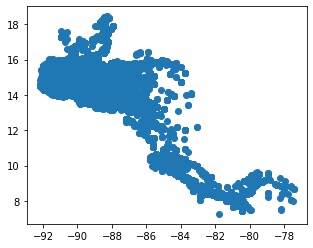

In [140]:
crime.plot()

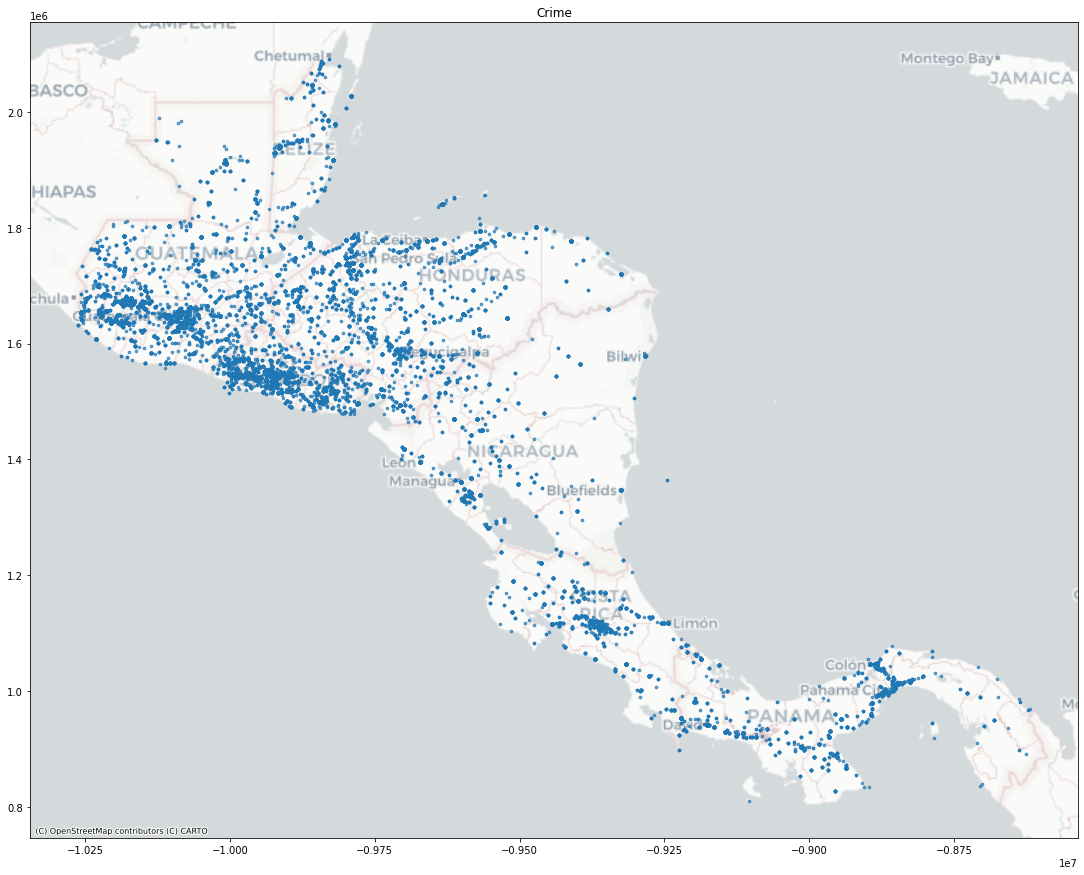

In [141]:
# Set CRS and reproject for basemap compatibility
crime.set_crs(epsg=4326, inplace=True)
crime = crime.to_crs(epsg=3857)

# Plot world map and overlay earthquakes
fig, ax = plt.subplots(figsize=(20, 15))

# Plot earthquakes (size based on magnitude)
crime.plot(ax=ax, alpha=0.7, markersize = 7)#, label="Schools", column = earthquakes["all_subjects"], legend=True, legend_kwds={"label": "Average Exam Score", "orientation": "vertical"})

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("Crime")
plt.show()

In [142]:
# crime.explore()

In [143]:
import seaborn as sns

Text(0, 0.5, 'Latitude')

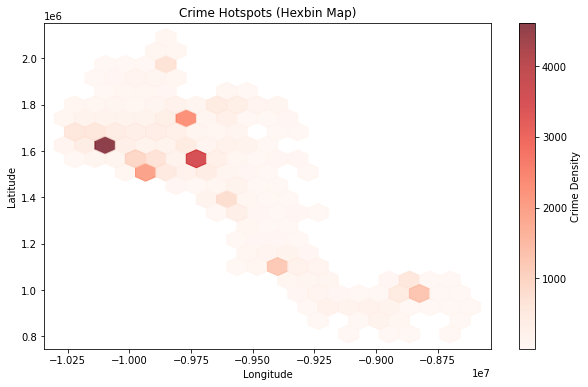

In [144]:
# Extract coordinates
x = crime.geometry.x
y = crime.geometry.y

# Create hexbin plot
fig, ax = plt.subplots(figsize=(10, 6))
hb = ax.hexbin(x, y, gridsize=20, cmap='Reds', alpha=0.75, mincnt=1)  # Adjust gridsize for resolution
plt.colorbar(hb, label="Crime Density")
ax.set_title("Crime Hotspots (Hexbin Map)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

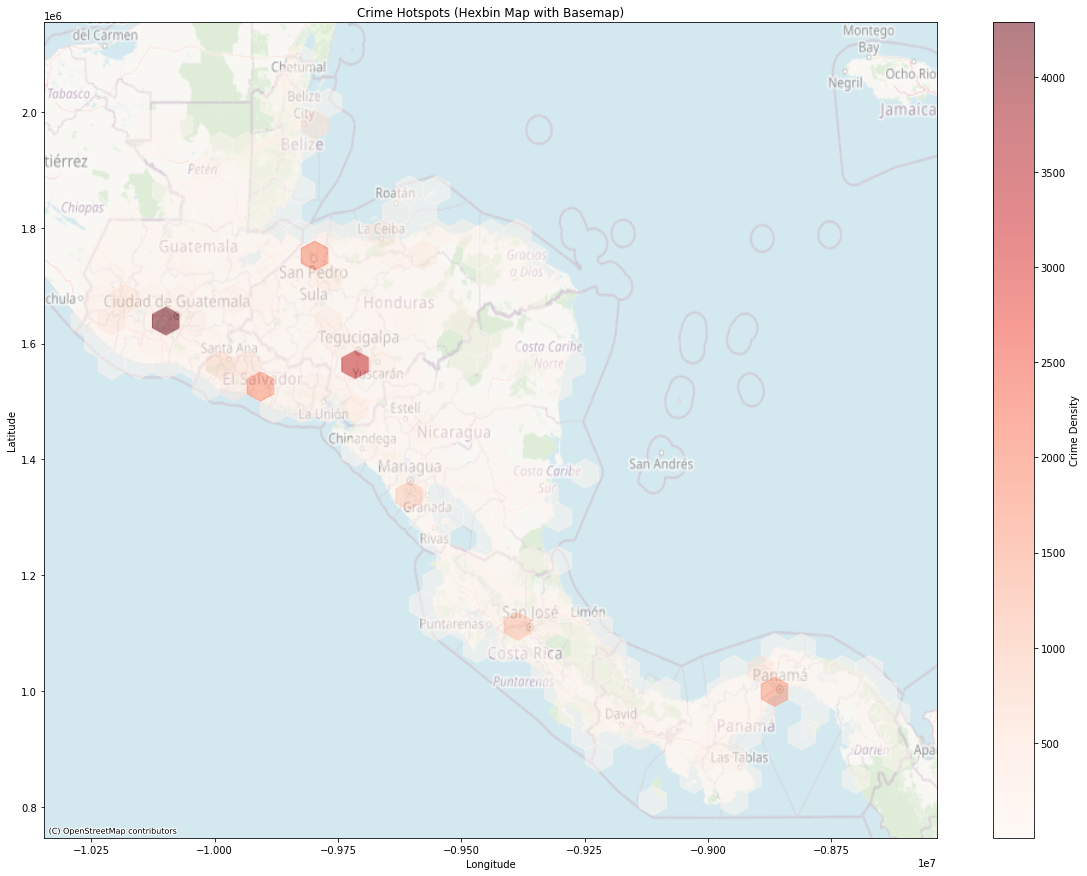

In [145]:


# Load point dataset
# gdf = gpd.read_file("your_file.geojson")

# Convert to Web Mercator (EPSG:3857) for basemap compatibility
crime = crime.to_crs(epsg=3857)

# Extract projected coordinates
x = crime.geometry.x
y = crime.geometry.y

# Create figure and plot hexbin
fig, ax = plt.subplots(figsize=(20, 15))
hb = ax.hexbin(x, y, gridsize=30, cmap='Reds', alpha=0.5, mincnt=1)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

# Customize plot
plt.colorbar(hb, label="Crime Density")
ax.set_title("Crime Hotspots (Hexbin Map with Basemap)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


# **Discussion Questions for Crime Hotspots Hexbin Map**

## **General Interpretation**
1. **What does this map tell us about crime distribution in the region?**  
2. **Are there clear crime hotspots, or does crime appear evenly distributed?**  
3. **What might explain the concentration of crime in certain hexagonal bins?**  

## **Hexbin Representation**
4. **What are the benefits of using hexbin aggregation instead of individual points?**  
5. **Would smaller or larger hexagons change the interpretation of the data?**  
6. **What does the color gradient represent, and how does it help highlight density?**  

## **Basemap & Context**
7. **How does the OpenStreetMap basemap contribute to the story?**  
8. **Does the transparency of the hexbins help or hinder interpretation?**  
9. **Would adding city or region labels improve clarity?**  

## **Alternative Visualizations**
10. **Would a kernel density estimation (KDE) plot be a better choice for showing crime hotspots?**  
11. **How would a choropleth map (aggregating by administrative boundaries) change the argument?**  
12. **Would a time series animation (crime over time) add more depth to this visualization?**  

## **Modifications for Different Arguments**
13. **What if we filtered the data by crime type—would different crimes cluster differently?**  
14. **How would adding a second variable (e.g., population density, income levels) help explain crime distribution?**  
15. **Would an interactive version of this map (e.g., hover tooltips with more data) enhance the storytelling?**  


In [146]:
import contextily as cx

print(cx.providers.keys()) 

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'Stamen', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'Gaode', 'Strava', 'OrdnanceSurvey'])


In [147]:


# Load point dataset
# gdf = gpd.read_file("your_file.geojson")  # Ensure it has geometry



crimes = crime.sample(500).to_crs("epsg:4326")

# Get center of points for map focus
map_center = [crimes.geometry.y.mean(), crimes.geometry.x.mean()]

# Create Folium map
m = folium.Map(location=map_center, zoom_start=6)

# Add points to the map
for _, row in crimes.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6,
    ).add_to(m)

# Save or display
# m.save("crime_map.html")  # Opens in a browser
m


In [148]:

# Load point dataset
# gdf = gpd.read_file("your_file.geojson")

# Get center of points for map focus
map_center = [crimes.geometry.y.mean(), crimes.geometry.x.mean()]

# Define color scale based on fatalities
colormap = cm.LinearColormap(
    colors=['green', 'yellow', 'red'],  # Low to high fatalities
    vmin=crimes['fatalities'].min(),
    vmax=crimes['fatalities'].max()
)

# Create Folium map
m = folium.Map(location=map_center, zoom_start=6)

# Add points to map
for _, row in crimes.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=2,
        color=colormap(row["fatalities"]),
        fill=True,
        fill_color=colormap(row["fatalities"]),
        fill_opacity = 1,
        popup=f"Fatalities: {row['fatalities']}"
    ).add_to(m)

# Add color legend
colormap.caption = "Number of Fatalities"
colormap.add_to(m)

# Save or display
m.save("crime_fatalities_map.html")
m


# **Discussion Questions for the Crime Map with Fatalities Overlay**

## **General Interpretation**
1. **What does this map tell us about the spatial distribution of crime incidents?**
2. **How does the color scale help convey the severity of incidents?**
3. **Are there regions with clusters of high-fatality incidents? Why might that be?**

## **Color and Symbology**
4. **How effectively does the color gradient (green to red) communicate the number of fatalities?**
5. **Would a different color scheme (e.g., blue to red) make patterns more distinct?**
6. **Are the size and transparency of the points appropriate for readability?**

## **Spatial Trends**
7. **Are there visible crime corridors or hotspots along highways or urban areas?**
8. **Do urban and rural areas show different crime patterns?**
9. **What external factors (e.g., borders, economic hubs, migration routes) might influence the distribution of incidents?**

## **Alternative Visualizations**
10. **Would a heatmap be more effective at highlighting high-fatality regions?**
11. **Would a cluster-based visualization (grouping nearby points) provide more clarity?**
12. **What additional layers (e.g., population density, police station locations) could provide more context?**

## **Data & Context**
13. **What temporal trends might be worth analyzing (e.g., does crime fluctuate over time)?**
14. **Does the visualization provide enough information to understand causes, or would additional socioeconomic data help?**
15. **Would an interactive version with filters (e.g., crime type, time of day) enhance insights?**

## **Modifications for Different Arguments**
16. **What happens if we normalize fatalities by population—do trends shift?**
17. **Could a road network overlay help reveal if crimes are concentrated along specific transportation routes?**
18. **Would splitting the data into different crime types change how we interpret the distribution?**


In [149]:
crime

event_id_c       event_date  year  time_preci          disorder_t  \
0        GTM8861  24 January 2025  2025           1  Political violence   
1       HND10433  24 January 2025  2025           2  Political violence   
2       HND10447  24 January 2025  2025           1      Demonstrations   
3       HND10451  24 January 2025  2025           1      Demonstrations   
4       HND10453  24 January 2025  2025           1      Demonstrations   
...          ...              ...   ...         ...                 ...   
32327    GTM1903  01 January 2018  2018           1  Political violence   
32328     CRI817  01 January 2018  2018           1      Demonstrations   
32329     BLZ175  01 January 2018  2018           1  Political violence   
32330     BLZ453  01 January 2018  2018           1  Political violence   
32331    HND2165  01 January 2018  2018           1  Political violence   

                       event_type        sub_event_  \
0      Violence against civilians            Attack   
1      Violence against civilians            Attack   
2                        Protests  Peaceful protest   
3                        Protests  Peaceful protest   
4                        Protests  Peaceful protest   
...                           ...               ...   
32327                     Battles       Armed clash   
32328                    Protests  Peaceful protest   
32329                     Battles       Armed clash   
32330  Violence against civilians            Attack   
32331  Violence against civilians            Attack   

                                    actor1  \
0            Unidentified Gang (Guatemala)   
1      Unidentified Armed Group (Honduras)   
2                    Protesters (Honduras)   
3                    Protesters (Honduras)   
4                    Protesters (Honduras)   
...                                    ...   
32327        Unidentified Gang (Guatemala)   
32328              Protesters (Costa Rica)   
32329                  Majestic Alley Gang   
32330           Unidentified Gang (Belize)   
32331         Unidentified Gang (Honduras)   

                                assoc_acto             inter1  ... latitude  \
0                                     None  Political militia  ...  14.6225   
1                                     None  Political militia  ...  14.9448   
2      Miskito Indigenous Group (Honduras)         Protesters  ...  15.0260   
3                      Teachers (Honduras)         Protesters  ...  13.5361   
4                         Women (Honduras)         Protesters  ...  15.5042   
...                                    ...                ...  ...      ...   
32327                                 None  Political militia  ...  14.6225   
32328        Taxi/Bus Drivers (Costa Rica)         Protesters  ...   9.9356   
32329                                 None  Political militia  ...  17.4995   
32330                                 None  Political militia  ...  17.5672   
32331                                 None  Political militia  ...  15.6144   

      longitude geo_precis                                             source  \
0      -90.5184          1                           Prensa Libre (Guatemala)   
1      -88.7421          2                              El Heraldo (Honduras)   
2      -84.2825          1                                    Proceso Digital   
3      -87.4875          1                                                HCH   
4      -88.0250          1                                    Proceso Digital   
...         ...        ...                                                ...   
32327  -90.5184          1         Dialogos - Observatorio sobre la Violencia   
32328  -84.0986          1                                       Diario Extra   
32329  -88.1976          1  Breaking Belize News; Channel 5 Belize; Guardi...   
32330  -88.4066          1             Breaking Belize News; Channel 5 Belize   
32331  -87.9530          1                         

In [151]:
import geopandas as gpd
import folium
import random

# Load dataset

# Get map center
map_center = [crimes.geometry.y.mean(), crimes.geometry.x.mean()]

# Create a base map
m = folium.Map(location=map_center, zoom_start=6, tiles="OpenStreetMap")

# Generate a color dictionary for unique crime types
crime_types = crimes["disorder_t"].unique()
colors = {crime: f"#{random.randint(0, 0xFFFFFF):06x}" for crime in crime_types}  # Random colors

# Add points with colors based on crime type
for _, row in crimes.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color=colors[row["disorder_t"]],
        fill=True,
        fill_color=colors[row["disorder_t"]],
        fill_opacity=0.6,
        popup=f"Type: {row['disorder_t']}"
    ).add_to(m)

# Save and display
m.save("crime_type_map.html")
m
